<a href="https://colab.research.google.com/github/micattia/Capstone/blob/master/06_Exprimental_Test_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load pandas component for data science
import pandas as pd

#load Apple data 
linkAP1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleFinalData.csv'
dfAPPL = pd.read_csv(linkAP1)
linkAP2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleNewsStock.csv'
dfAPPLnews = pd.read_csv(linkAP2)

#load Microsoft data
linkMS1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftFinalData.csv'
dfMS = pd.read_csv(linkMS1)
linkMS2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftNewsStock.csv'
dfMSnews = pd.read_csv(linkMS2)

# Changing Some column names for the Microsoft main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfMS = dfMS.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

# Changing Some column names for the Apple main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfAPPL = dfAPPL.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})


In [0]:
#loading required libraries 
#==========================
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff
%matplotlib inline

plt.style.use('ggplot')

In [0]:
# Building a simple linier regression model and show its generated linier formula
# removed the Close variable from the dataset since it is the same value as the Adj_Close dependant variable
# which will lead to always have 100% accuracy

from statsmodels.formula.api import ols
model = ols('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', data=dfMS)
model = model.fit()
print(model.params)
#print(model)

Intercept   -0.007568
Open        -0.524203
High         0.760597
Low          0.764195
Compound    -0.005027
Neg         -0.018313
Neu         -0.000197
Pos         -0.017996
dtype: float64


In [0]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.886e+05
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:11:45   Log-Likelihood:                 410.96
No. Observations:                2517   AIC:                            -805.9
Df Residuals:                    2509   BIC:                            -759.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0076      0.015     -0.495      0.6

In [0]:
# Using Anova test to compare between the two models where one have the financial data only 
# while the other have the sentiment analysis as well
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols('Adj_Close ~ Open + High + Low ', data=dfMS).fit()
model2 = ols('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', data=dfMS).fit()
anova_result = anova_lm(model1, model2)
print(anova_result)

   df_resid         ssr  df_diff  ss_diff         F    Pr(>F)
0    2513.0  106.338547      0.0      NaN       NaN       NaN
1    2509.0  106.314047      4.0   0.0245  0.144548  0.965438


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



In [0]:
#Testing the Simple Linier Regression model and see its predective values
# in this section we created the model and did predection using some data input by hand 
#model = ols('Adj_Close ~ Open + High + Low + Close + Compound + Neg + Neu + Pos', data=dfMS).fit()
#test_df = pd.DataFrame(columns=["Open" ,"High","Low","Close","Compound","Neg","Neu","Pos"], data=[[30.14, 30.23, 30.03, 30.13, 0.126, 0.048,0.868,0.084]])
#mpg_pred = model.get_prediction(test_df)
#mpg_pred.conf_int(alpha=0.05)

In [0]:
################################ 1- SIMPLE LINEAR REGRESSION MODELS ######################################################
################################################################################
# TEST 1
# BUILDING FIRST PREDECTION MODEL - SIMPLE LINIER REGRESSION
# TEST GIVE 100% ACURACY WITH THE CLOSE COLUMN, AS IT IS THE SAME AS ADJ_CLOSE VALUE
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sm1

train_set, test_set = train_test_split(dfMS, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low + Close + Compound + Neg + Neu + Pos', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.113e+31
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:12:22   Log-Likelihood:                 52172.
No. Observations:                1761   AIC:                        -1.043e+05
Df Residuals:                    1752   BIC:                        -1.043e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.057e-14   2.95e-15     -3.580      0.000   -1.64e-14   -4.78e-15
Open       -3.275e-15   3.69e-15     -0.887      0.375   -1.05e-14    3.96e-15
High        1.277e-15   3.99e-15      0.320      0.749   -6.55e-15    9.11e-15
Low         4.226e-15   3.94e-15      1.073      0.283    -3.5e-15    1.19e-14
Close          1.0000    3.8e-15   2.63e+14      0.000       1.000       1.000
Compound    4.552e-15   3.87e-15      1.175      0.240   -3.04e-15    1.21e-14
Neg         3.209e-14   2.68e-14      1.196      0.232   -2.05e-14    8.47e-14
Neu         -1.18e-15   2.42e-15     -0.488      0.626   -5.92e-15    3.56e-15
Pos        -1.788e-14   2.33e-14     -0.768      0.443   -6.36e-14    2.78e-14
==============================================================================
Omnibus:                      172.856   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.887
Skew:                          -0.879   Prob(JB):                     5.40e-50
Kurtosis:                       2.997   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low + Close + Compound + Neg + Neu + Pos', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

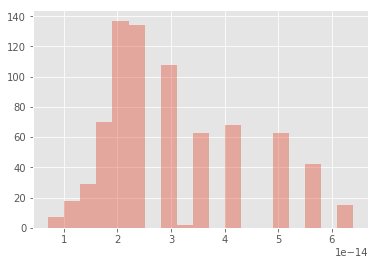

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Calculating the root mean square errors 
# Calculating the percentage of cases with less than 5% error
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 3.295012163886266e-14
PRED(05): 1.0


In [0]:
################################################################################
# TEST 2
# TESTING DIFFRENT PREDECTION - SIMPLE LINIER REGRESSION
# REMOVE CLOSE COLUMN AS IT IS THE SAME VALUE AS ADJ_CLOSE
# TEST SHOWS WHEN REMOVING THE ACCURACY WAS DECREASED 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
#from patsy import dmatrices
#from sklearn.model_selection import train_test_split
#import statsmodels.discrete.discrete_model as sm
#import statsmodels.api as sm1

train_set, test_set = train_test_split(dfMS, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.119e+05
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:38:35   Log-Likelihood:                 277.50
No. Observations:                1761   AIC:                            -539.0
Df Residuals:                    1753   BIC:                            -495.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0217      0.019     -1.168      0.243      -0.058       0.015
Open          -0.5077      0.020    -25.693      0.000      -0.546      -0.469
High           0.7643      0.017     44.469      0.000       0.731       0.798
Low            0.7443      0.017     43.292      0.000       0.711       0.778
Compound      -0.0093      0.024     -0.381      0.703      -0.057       0.038
Neg           -0.1510      0.168     -0.896      0.370      -0.481       0.180
Neu            0.0056      0.015      0.367      0.714      -0.024       0.035
Pos           -0.0086      0.146     -0.059      0.953      -0.295       0.278
==============================================================================
Omnibus:                      220.868   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2353.651
Skew:                          -0.038   Prob(JB):                         0.00
Kurtosis:                       8.663   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

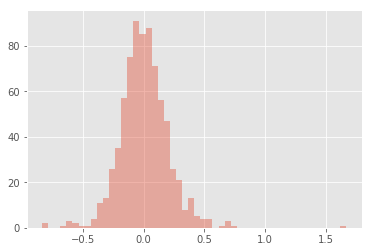

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
# Errors looks to be normaly distributed with few outliers
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 0.20341252937648835
PRED(05): 0.9986772486772487


In [0]:
# THE SQUARE ERRORS AND PRED ACUARCY WAS BETTER WHEN THE CLOSE VARIABLE WAS THERE
# WHEN REMOVED IT SHOWED MORE SQUARE ERROR AND LESS ACURACY BUT STILL THE ACUARY WAS HIGHT 

In [0]:
################################################################################
# TEST 3
# TESTING DIFFRENT PREDECTION - SIMPLE LINIER REGRESSION
# REMOVE Sentiment analysis columns and see if it was doing better
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
#from patsy import dmatrices
#from sklearn.model_selection import train_test_split
#import statsmodels.discrete.discrete_model as sm
#import statsmodels.api as sm1

train_set, test_set = train_test_split(dfMS, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.430e+06
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                 276.72
No. Observations:                1761   AIC:                            -545.4
Df Residuals:                    1757   BIC:                            -523.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0249      0.018     -1.398      0.162      -0.060       0.010
Open          -0.5085      0.020    -25.786      0.000      -0.547      -0.470
High           0.7649      0.017     44.572      0.000       0.731       0.799
Low            0.7444      0.017     43.445      0.000       0.711       0.778
==============================================================================
Omnibus:                      221.182   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2364.276
Skew:                          -0.035   Prob(JB):                         0.00
Kurtosis:                       8.676   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

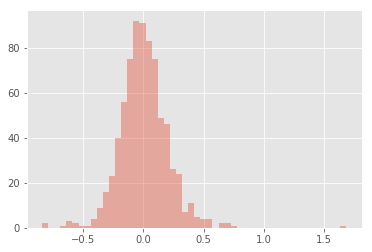

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
# Errors looks to be normaly distributed with few outliers
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 0.20308116766549456
PRED(05): 0.9986772486772487


In [0]:
# TEST SHOWS THAR ACCURACY WAS NOT CHANGED WHEN REMOVING THE SENTIMENT ANALYSIS COLUMNS

In [3]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
################################################################################
# TEST 1
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

dfMS1 = dfMS.drop('Date', axis=1)

train_set, test_set = train_test_split(dfMS1, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

##########################################3
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#x_train_scaled = scaler.fit_transform(x_train)
#x_train = pd.DataFrame(x_train_scaled)

#x_test_scaled = scaler.fit_transform(x_test)
#x_test = pd.DataFrame(x_test_scaled)

###########################################
  
model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.17939743201490005


In [7]:
# Providing Test Data to the KNN Prediction Model to see its Prediction
test_df = pd.DataFrame(columns=["Open" ,"High","Low","Close","Compound","Neg","Neu","Pos"], data=[[28.82, 29.4, 28.8, 29.4, 0, 0,0,0]])
mpg_pred = model.predict(test_df)
mpg_pred


array([29.28857143])